## Exercise 1: Basic Complex Number Operations
1. Manually calculate and then verify using Python the result of `(3 + 4j) + (1 - 2j)`, `(5 + 6j) * (7 - 8j)`, and `(2 - 3j) / (1 + 4j)`.
2. Find the conjugate and modulus of `(3 - 4j)`.

In [9]:
# Exercise 1
# 1
a = 3 + 4j
b = 1 - 2j
print(a + b)

a = 5 + 6j
b = 7 - 8j
print(a * b)

a = 2 - 3j 
b = 1 + 4j
print(a / b)

#2
a = 3 - 4j
print(a.conjugate())
print(abs(a))



(4+2j)
(83+2j)
(-0.5882352941176471-0.6470588235294118j)
(3+4j)
5.0


## Exercise 2: Visualizing Complex Operations
1. Write a Python function to plot a complex number on the complex plane. Use it to plot `(3 + 4j)` and its conjugate.
2. Extend the function to show addition and multiplication of two complex numbers graphically.

In [2]:
# Exercise 2
# 1
import cmath
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

def convert_and_plot(real=0, imaginary=0, magnitude=0, angle=0, convert_to='polar'):
    if convert_to == 'polar':
        z = complex(real, imaginary)
        r, theta = cmath.polar(z)
        display_text = f"Cartesian: ({real}, {imaginary}) -> Polar: (r={r:.2f}, θ={np.degrees(theta):.2f}°)"
    else:
        z = cmath.rect(magnitude, np.radians(angle))
        display_text = f"Polar: (r={magnitude}, θ={angle}°) -> Cartesian: ({z.real:.2f}, {z.imag:.2f})"

    fig, ax = plt.subplots()
    ax.plot([0, z.real], [0, z.imag], 'ro-')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    ax.grid(True)
    plt.title(display_text)
    plt.show()

style = {'description_width': 'initial'}
layout = widgets.Layout(width='400px')

# Creating interactive widgets
real_slider = widgets.FloatSlider(min=-5, max=5, step=0.1, value=0, description='Real Part:', style=style, layout=layout)
imaginary_slider = widgets.FloatSlider(min=-5, max=5, step=0.1, value=0, description='Imaginary Part:', style=style, layout=layout)
magnitude_slider = widgets.FloatSlider(min=0, max=5, step=0.1, value=1, description='Magnitude:', style=style, layout=layout)
angle_slider = widgets.FloatSlider(min=-180, max=180, step=1, value=0, description='Angle (degrees):', style=style, layout=layout)
convert_dropdown = widgets.Dropdown(options=['polar', 'cartesian'], value='polar', description='Convert to:', style=style, layout=layout)

# Interactive function

ui = widgets.VBox([widgets.HBox([real_slider, imaginary_slider]), 
                   widgets.HBox([magnitude_slider, angle_slider]),
                   convert_dropdown])
out = widgets.interactive_output(convert_and_plot, {'real': real_slider, 'imaginary': imaginary_slider, 
                                                    'magnitude': magnitude_slider, 'angle': angle_slider, 
                                                    'convert_to': convert_dropdown})
#--------------------------------------------------------------------------------------------
# 1
def plot_complex (complex):
    real_slider = widgets.FloatSlider(min=-5, max=5, step=0.1, value = complex.real , description='Real Part:', style=style, layout=layout)
    imaginary_slider = widgets.FloatSlider(min=-5, max=5, step=0.1, value = complex.imag, description='Imaginary Part:', style=style, layout=layout)
    magnitude_slider = widgets.FloatSlider(min=0, max=5, step=0.1, value=1, description='Magnitude:', style=style, layout=layout)
    angle_slider = widgets.FloatSlider(min=-180, max=180, step=1, value=0, description='Angle (degrees):', style=style, layout=layout)
    convert_dropdown = widgets.Dropdown(options=['polar', 'cartesian'], value='polar', description='Convert to:', style=style, layout=layout)

    ui = widgets.VBox([widgets.HBox([real_slider, imaginary_slider]), 
                   widgets.HBox([magnitude_slider, angle_slider]),
                   convert_dropdown])
    out = widgets.interactive_output(convert_and_plot, {'real': real_slider, 'imaginary': imaginary_slider, 
                                                    'magnitude': magnitude_slider, 'angle': angle_slider, 
                                                    'convert_to': convert_dropdown})
    display(ui, out)
a = 3 + 4j
plot_complex(a)

#2
def plot_complex_opera (a, b):
    com1 = a + b
    com2 = a * b 
    plot_complex(com1)
    plot_complex(com2)
 
a = 3 + 4j
b = 2 - 3j

plot_complex_opera (a, b)

Output()

Output()

Output()

## Exercise 3: Exploring the Mandelbrot Set
1. Modify the provided Mandelbrot set code to change its zoom level and center point. Observe how the fractal pattern changes.
2. Experiment with different values of `max_iter` and observe the effect on the fractal's detail and computation time.

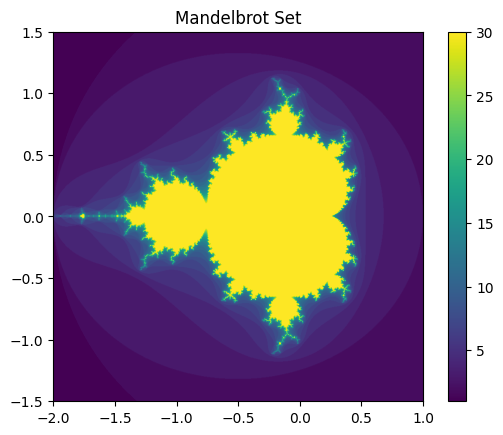

1.
Experimentando con el mismo centro pero alejando el zoom


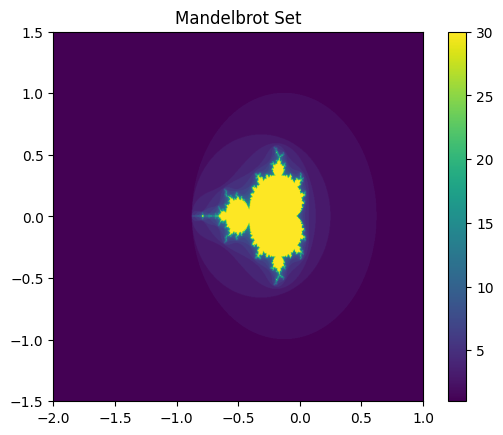

experimentando con el cambio de centro pero el mismo zoom inicial


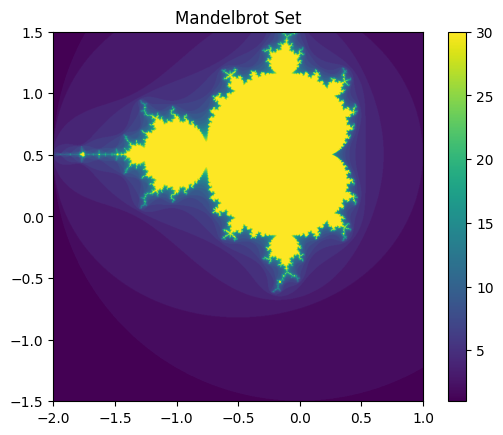

Se evidencia claramenete como se mantiene la figura in cluso con el cambio de zoom
pero con algunos valores y a grandes cambios la figura no responde bien,
como por ejemplo la siguiente.


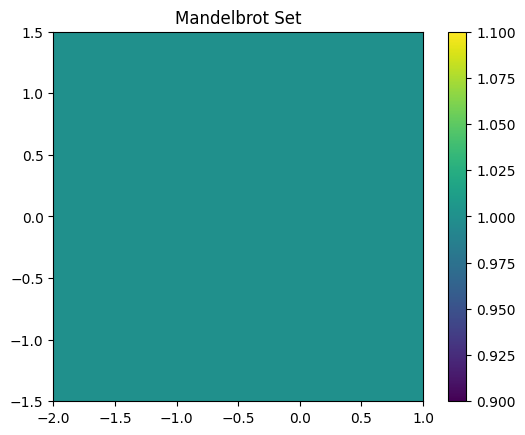

2
Se usaran los valores iniciales pero con un max_iter diferente


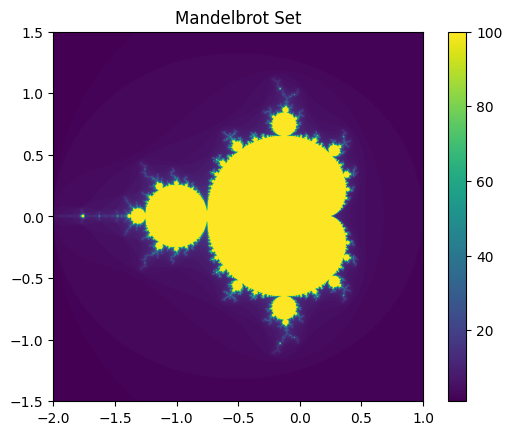

Nueva prueba con un max iter mucho mas alto


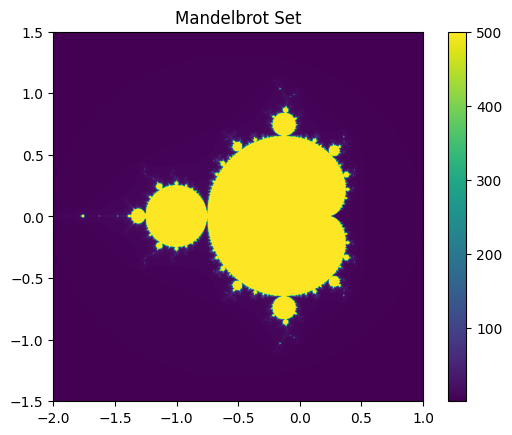

Para finalizar se mostrara el tiempo de ejcucion de cada uno de una de las pruebas.
tiempo max_iter = 30 1.1180167198181152
tiempo max_iter = 100 2.2880806922912598
tiempo max_iter = 500 8.72694993019104
se eviendia que a mas alto el max_iter el tiempo de ejecucion se vuelve mucho mayor
y la imagen se hace mas nitida.


In [2]:
# 1. Experimenting with zoom.
import time

import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

# Create a grid of complex numbers
time_inicial_30 = time.time()
pixels = 800
max_iter = 30
x = np.linspace(-2, 1, pixels)
y = np.linspace(-1.5, 1.5, pixels)
xx, yy = np.meshgrid(x, y)
c = xx + yy*1j
# Compute Mandelbrot set
mandelbrot_set = np.array([mandelbrot(ci, max_iter) for ci in c.ravel()]).reshape(c.shape)

# Plot
plt.imshow(mandelbrot_set, extent=[-2, 1, -1.5, 1.5])
plt.colorbar()
plt.title("Mandelbrot Set")
plt.show()
time_final_30 = time.time()

print("1.")
print("Experimentando con el mismo centro pero alejando el zoom")
pixels = 800
max_iter = 30
x = np.linspace(-5, 3, pixels)
y = np.linspace(-3, 3, pixels)
xx, yy = np.meshgrid(x, y)
c = xx + yy*1j

# Compute Mandelbrot set
mandelbrot_set = np.array([mandelbrot(ci, max_iter) for ci in c.ravel()]).reshape(c.shape)

# Plot
plt.imshow(mandelbrot_set, extent=[-2, 1, -1.5, 1.5])
plt.colorbar()
plt.title("Mandelbrot Set")
plt.show()

print("experimentando con el cambio de centro pero el mismo zoom inicial")

# Create a grid of complex numbers
pixels = 800
max_iter = 30
x = np.linspace(-2, 1, pixels)
y = np.linspace(-1, 2, pixels)
xx, yy = np.meshgrid(x, y)
c = xx + yy*1j

# Compute Mandelbrot set
mandelbrot_set = np.array([mandelbrot(ci, max_iter) for ci in c.ravel()]).reshape(c.shape)

# Plot
plt.imshow(mandelbrot_set, extent=[-2, 1, -1.5, 1.5])
plt.colorbar()
plt.title("Mandelbrot Set")
plt.show()

print("Se evidencia claramenete como se mantiene la figura in cluso con el cambio de zoom")
print("pero con algunos valores y a grandes cambios la figura no responde bien,")
print("como por ejemplo la siguiente.")

pixels = 800
max_iter = 30
x = np.linspace(-5, -3, pixels)
y = np.linspace(-4.5, -1.5, pixels)
xx, yy = np.meshgrid(x, y)
c = xx + yy*1j

# Compute Mandelbrot set
mandelbrot_set = np.array([mandelbrot(ci, max_iter) for ci in c.ravel()]).reshape(c.shape)

# Plot
plt.imshow(mandelbrot_set, extent=[-2, 1, -1.5, 1.5])
plt.colorbar()
plt.title("Mandelbrot Set")
plt.show()

print("2")
print("Se usaran los valores iniciales pero con un max_iter diferente")
# Create a grid of complex numbers
time_inicial_100 = time.time()
pixels = 800
max_iter = 100
x = np.linspace(-2, 1, pixels)
y = np.linspace(-1.5, 1.5, pixels)
xx, yy = np.meshgrid(x, y)
c = xx + yy*1j

# Compute Mandelbrot set
mandelbrot_set = np.array([mandelbrot(ci, max_iter) for ci in c.ravel()]).reshape(c.shape)

# Plot
plt.imshow(mandelbrot_set, extent=[-2, 1, -1.5, 1.5])
plt.colorbar()
plt.title("Mandelbrot Set")
plt.show()

time_final_100 = time.time()

print("Nueva prueba con un max iter mucho mas alto")

time_inicial_500 = time.time()
pixels = 800
max_iter = 500
x = np.linspace(-2, 1, pixels)
y = np.linspace(-1.5, 1.5, pixels)
xx, yy = np.meshgrid(x, y)
c = xx + yy*1j

# Compute Mandelbrot set
mandelbrot_set = np.array([mandelbrot(ci, max_iter) for ci in c.ravel()]).reshape(c.shape)

# Plot
plt.imshow(mandelbrot_set, extent=[-2, 1, -1.5, 1.5])
plt.colorbar()
plt.title("Mandelbrot Set")
plt.show()

time_final_500 = time.time()

print("Para finalizar se mostrara el tiempo de ejcucion de cada uno de una de las pruebas.")
print("tiempo max_iter = 30" , time_final_30 - time_inicial_30)
print("tiempo max_iter = 100" , time_final_100 - time_inicial_100)
print("tiempo max_iter = 500" , time_final_500 - time_inicial_500)
print("se eviendia que a mas alto el max_iter el tiempo de ejecucion se vuelve mucho mayor")
print("y la imagen se hace mas nitida.")

## Exercise 4: Creating a Julia Set
1. Implement a Julia set generator. Use a constant like `-0.4 + 0.6j` for the iteration `z = z*z + constant`.
2. Explore how changing the constant changes the pattern of the Julia set.

punto 1


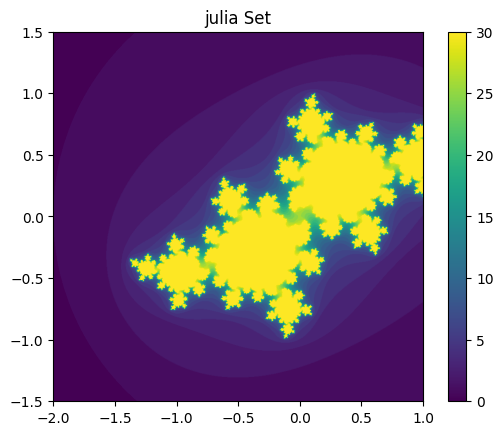

punto 2
Se experiemntara con el cambio en la constante, primero cambiando los signos


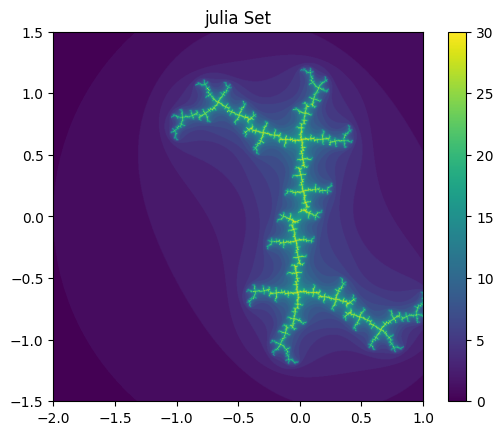

al cambiar el signo de la constante, se puede evidenciar un cambio total en la imagen
no solo en tamaño, tambien en forma y direccion
por ultimo se multiplicara por dos la constante original


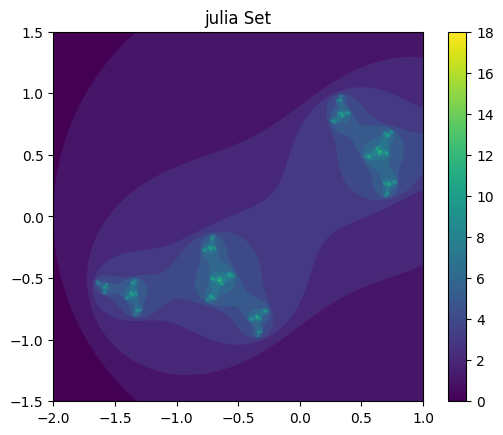

la figura mantiene la direccion original, pero practicamente desaparece


In [3]:
import numpy as np
import matplotlib.pyplot as plt
print("punto 1")
def mandelbrot(z, c, max_iter):

    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

# Create a grid of complex numbers

pixels = 800
max_iter = 30
x = np.linspace(-2, 1, pixels)
y = np.linspace(-1.5, 1.5, pixels)
xx, yy = np.meshgrid(x, y)
z = xx + yy*1j
c = -0.4 + 0.6j
# Compute Mandelbrot set
mandelbrot_set = np.array([mandelbrot(zi,c, max_iter) for zi in z.ravel()]).reshape(z.shape)

# Plot
plt.imshow(mandelbrot_set, extent=[-2, 1, -1.5, 1.5])
plt.colorbar()
plt.title("julia Set")
plt.show()
print("punto 2")
print("Se experiemntara con el cambio en la constante, primero cambiando los signos")
pixels = 800
max_iter = 30
x = np.linspace(-2, 1, pixels)
y = np.linspace(-1.5, 1.5, pixels)
xx, yy = np.meshgrid(x, y)
z = xx + yy*1j
c = 0.4 - 0.6j
# Compute Mandelbrot set
mandelbrot_set = np.array([mandelbrot(zi,c, max_iter) for zi in z.ravel()]).reshape(z.shape)

# Plot
plt.imshow(mandelbrot_set, extent=[-2, 1, -1.5, 1.5])
plt.colorbar()
plt.title("julia Set")
plt.show()

print("al cambiar el signo de la constante, se puede evidenciar un cambio total en la imagen")
print("no solo en tamaño, tambien en forma y direccion")

print("por ultimo se multiplicara por dos la constante original")

pixels = 800
max_iter = 30
x = np.linspace(-2, 1, pixels)
y = np.linspace(-1.5, 1.5, pixels)
xx, yy = np.meshgrid(x, y)
z = xx + yy*1j
c = -0.8 + 1.2j
# Compute Mandelbrot set
mandelbrot_set = np.array([mandelbrot(zi,c, max_iter) for zi in z.ravel()]).reshape(z.shape)

# Plot
plt.imshow(mandelbrot_set, extent=[-2, 1, -1.5, 1.5])
plt.colorbar()
plt.title("julia Set")
plt.show()

print("la figura mantiene la direccion original, pero practicamente desaparece")

## Exercise 5: Complex Number Properties
1. Prove that the absolute value of a product of two complex numbers is the product of their absolute values.
2. Show that the conjugate of a sum of two complex numbers is the sum of their conjugates.

In [4]:
print("punto 1")
print("Se provara haciendo dos funciones, y con varios ejemplos verificando que el resultado se el mismo")
a = 0.3 + 5j
b = 8 - 3.7j
def abs_product(a,b):
    producto = a*b
    return abs(producto)

def product_abs(a,b):
    a = abs(a)
    b = abs(b)
    return a*b
print(a)
print(b)
print(abs_product(a,b), product_abs(a,b))
print("TRUE" if abs_product(a,b) == product_abs(a,b) else "FALSE" )

a = 5.7 - 2j
b = -4.6 -3.9j

print(a)
print(b)
print(abs_product(a,b), product_abs(a,b))
print("TRUE" if abs_product(a,b) == product_abs(a,b) else "FALSE" )

a = 2.8 + 10j
b = 58 -100j

print(a)
print(b)
print(abs_product(a,b), product_abs(a,b))
print("TRUE" if abs_product(a,b) == product_abs(a,b) else "FALSE" )

print("punto 2")
print("Se provara de la misma forma que la anterior")


def sum_conjugate(a,b):
    sum = a+b
    return sum.conjugate()

def conjugate_sum(a,b):
    a = a.conjugate()
    b = b.conjugate()
    return a+b

a = 0.3 + 5j
b = 8 - 3.7j

print(a)
print(b)
print(sum_conjugate(a,b), conjugate_sum(a,b))
print("TRUE" if sum_conjugate(a,b) == conjugate_sum(a,b) else "FALSE" )

a = 5.7 - 2j
b = -4.6 -3.9j

print(a)
print(b)
print(sum_conjugate(a,b), conjugate_sum(a,b))
print("TRUE" if sum_conjugate(a,b) == conjugate_sum(a,b) else "FALSE" )

a = 2.8 + 10j
b = 58 -100j
print(a)
print(b)
print(sum_conjugate(a,b), conjugate_sum(a,b))
print("TRUE" if sum_conjugate(a,b) == conjugate_sum(a,b) else "FALSE" )

punto 1
Se provara haciendo dos funciones, y con varios ejemplos verificando que el resultado se el mismo
(0.3+5j)
(8-3.7j)
44.150221969996934 44.150221969996934
TRUE
(5.7-2j)
(-4.6-3.9j)
36.42995059013943 36.42995059013943
TRUE
(2.8+10j)
(58-100j)
1200.488967046345 1200.488967046345
TRUE
punto 2
Se provara de la misma forma que la anterior
(0.3+5j)
(8-3.7j)
(8.3-1.2999999999999998j) (8.3-1.2999999999999998j)
TRUE
(5.7-2j)
(-4.6-3.9j)
(1.1000000000000005+5.9j) (1.1000000000000005+5.9j)
TRUE
(2.8+10j)
(58-100j)
(60.8+90j) (60.8+90j)
TRUE
